In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from proj1_helpers import *
from data_helpers import *
from cross_validation import *
from plots import *
from implementations import *

In [15]:
#LOAD TRAINING DATA
DATA_TRAIN_PATH = 'data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [16]:
jet_samples_training = get_jet_samples(tX)


In [17]:
y = y[jet_samples_training[1]]
x = tX[jet_samples_training[1]]


In [12]:
degrees = range(1,20)

k_fold = 4
acc_training = []
acc_validation = []
lambda_ = 1e-3
seed= 1
for degree in degrees:
        acc_tr_tmp = []
        acc_val_tmp = []
        
        for k in range(k_fold):
            x_train, y_train, x_val, y_val = cross_validation(y, x, k, k_fold, seed)
            x_tr_clean,_ = clean_data(x_train)
            x_val_clean,_ = clean_data(x_val)
            x_train_aug, y_train = augment_data(x_tr_clean, y_train, degree)
            x_val_aug, y_val = augment_data(x_val_clean, y_val, degree)
            w,_ = ridge_regression (y_train, x_train_aug, lambda_)
            
            acc_tr = predict_accuracy (y_train, x_train_aug, w)
            acc_val = predict_accuracy (y_val, x_val_aug, w)
            
            acc_tr_tmp.append(acc_tr)
            acc_val_tmp.append(acc_val)
            
        print(degree, np.mean(acc_tr_tmp), np.mean(acc_val_tmp))

        acc_training.append(np.mean(acc_tr_tmp))
        acc_validation.append(np.mean(acc_val_tmp))


/Users/Sofia/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


1 71.05686234052064 71.03193025894976
2 75.62889026445201 75.54678634065822
3 76.59909212834003 76.51011038894048
4 77.67289108978989 77.60755184153513
5 78.11565046941091 78.00990405447232
6 78.49865882595688 78.37485814505312
7 79.28358953196465 79.15634994325802
8 80.0169366209292 79.859176725472
9 80.27270538876853 80.10419890642733
10 80.34019395440008 80.11838440111421
11 80.47345163176175 80.27055607139172
12 80.26023934798309 80.05777365108841
13 79.1576395336841 78.78881667182502
14 74.69651638639569 74.31006912204684
15 76.62359434643558 76.41210151655835
16 80.48720726297329 80.27442484266997
17 78.5081158224148 78.14917982048901
18 79.45768423948554 79.20148560817084
19 79.65155266687302 79.40137212421334


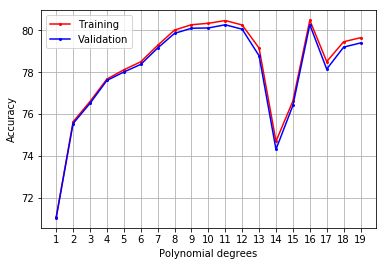

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(degrees, acc_training, label='Training', marker = "o", markersize = 2, color = "red")
plt.plot(degrees, acc_validation, label='Validation', marker = "o", markersize = 2, color = "blue")
plt.grid()
plt.legend()
plt.xticks(degrees)
plt.xlabel("Polynomial degrees")
plt.ylabel("Accuracy")
plt.show()
plt.savefig("build_poly_groupe_1_degre16")

In [18]:
lambdas = np.logspace(-10,-1,10)

k_fold = 4
acc_training = []
acc_validation = []
degree = 16
seed= 1
for ind_lambda,lambda_ in enumerate(lambdas):
        acc_tr_tmp = []
        acc_val_tmp = []
        
        for k in range(k_fold):
            x_tr, y_tr, x_val, y_val = cross_validation(y_train, x_train, k, k_fold, seed)
            
            x_tr,_ = clean_data(x_tr)
            x_val,_ = clean_data(x_val)
            x_train, y_train = augment_data(x_tr, y_tr, degree)
            x_val, y_val = augment_data(x_val, y_val, degree)
            w,_ = ridge_regression (y_train, x_train, lambda_)
            
            acc_tr = predict_accuracy (y_train, x_train, w)
            acc_val = predict_accuracy (y_val, x_val, w)
            
            acc_tr_tmp.append(acc_tr)
            acc_val_tmp.append(acc_val)
            
        print(degree, np.mean(acc_tr_tmp), np.mean(acc_val_tmp))

        acc_training.append(np.mean(acc_tr_tmp))
        acc_validation.append(np.mean(acc_val_tmp))

/Users/Sofia/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


KeyboardInterrupt: 